# Understanding Transformers 

The transformer model is based entirely on the __attention mechanism and completely gets rid of recurrence.__ 
The transformer uses a special type of attention mechanism called __self- attention.__
The transformer consists of an __encoder-decoder architecture__. We feed the input sentence (source sentence) to the encoder. The encoder learns the representation of the input sentence and sends the representation to the decoder. The decoder receives the representation learned by the encoder as input and generates the output sentence (target sentence).

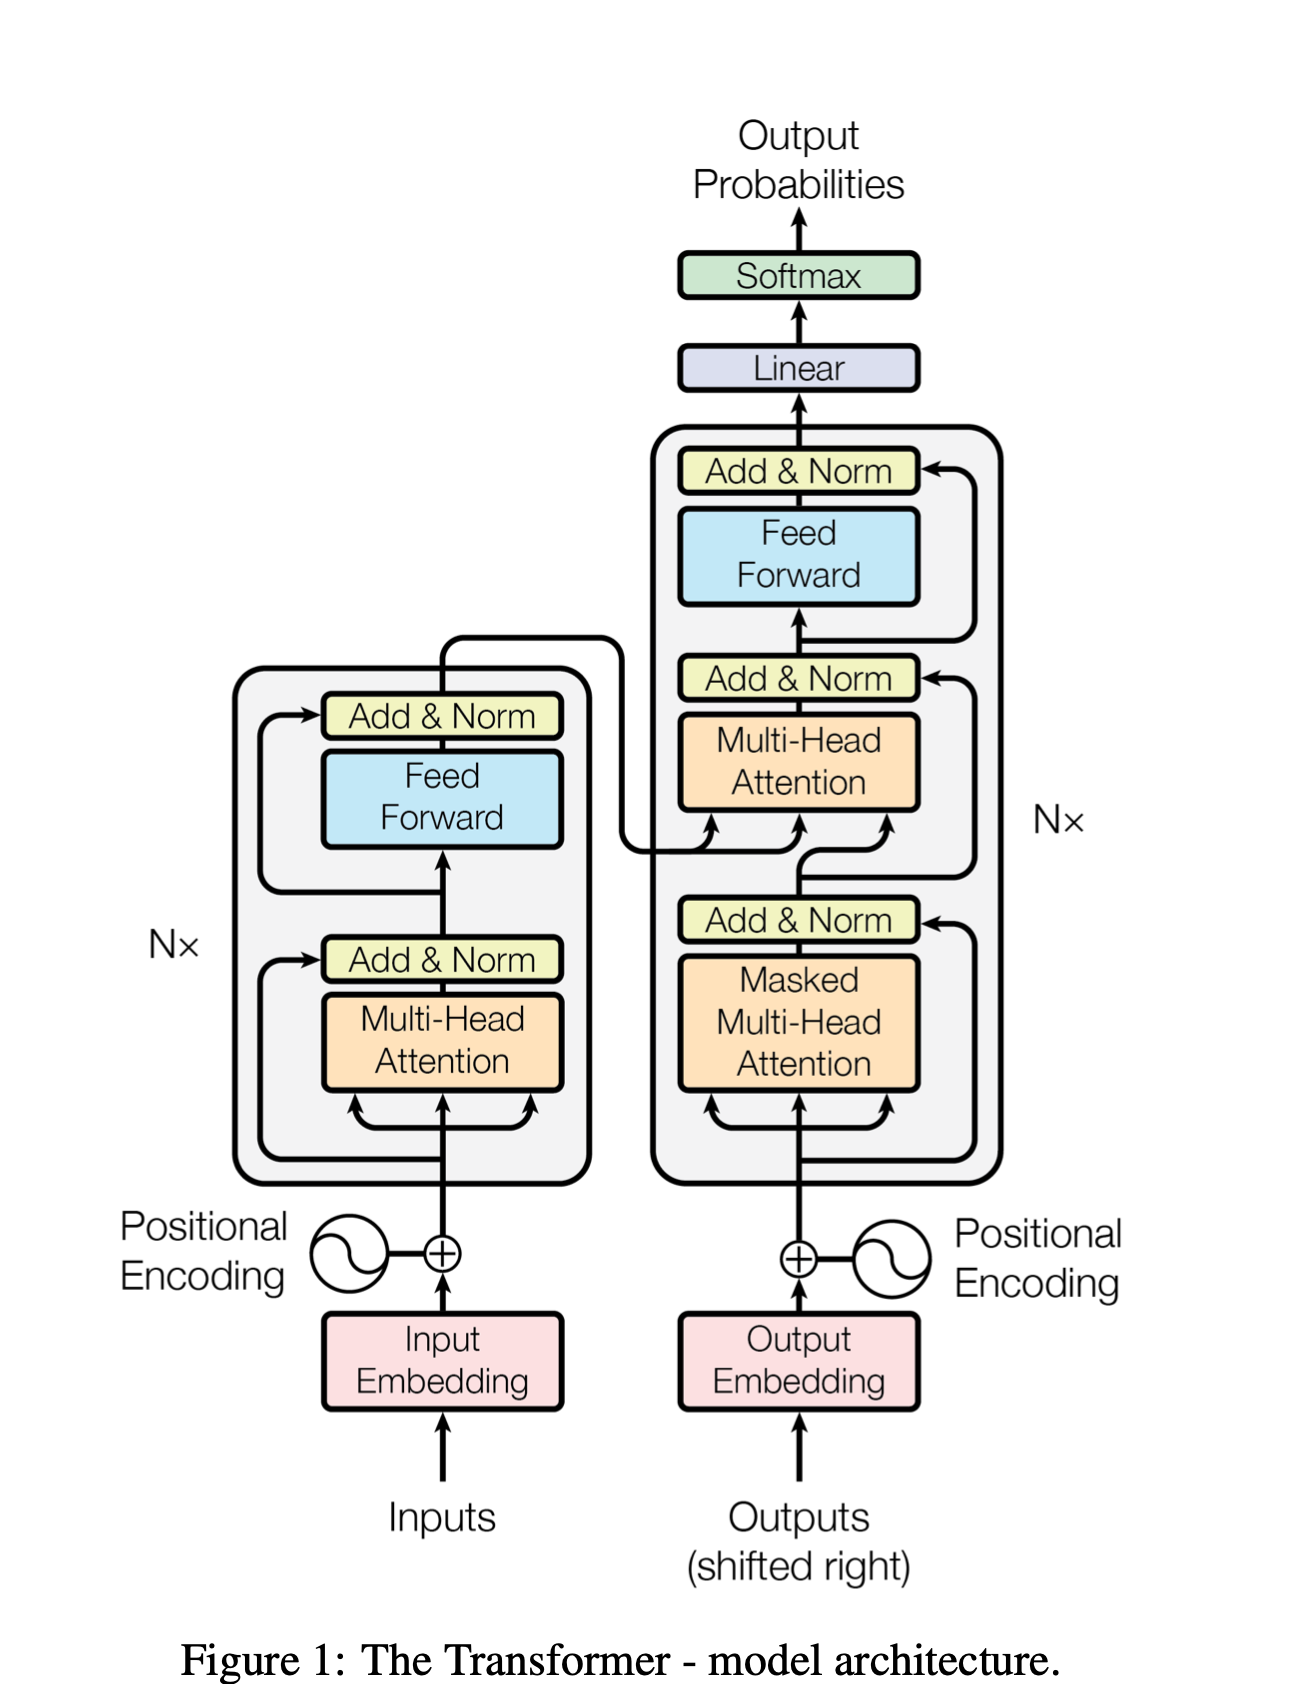

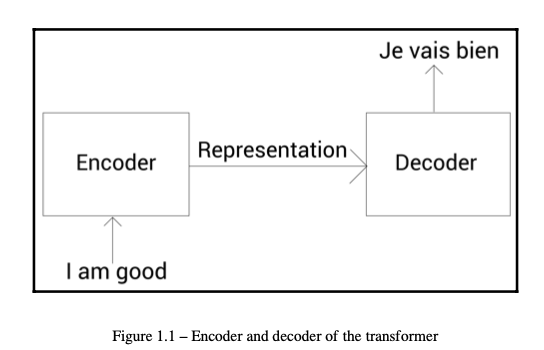

# Understanding Encoder

Transformer is consists of N stack of Encoders. Output of one encoder is input for second encoder and so on. The Final encoder output is representation. 
In __Attention is All you need__ paper, they used N=6.

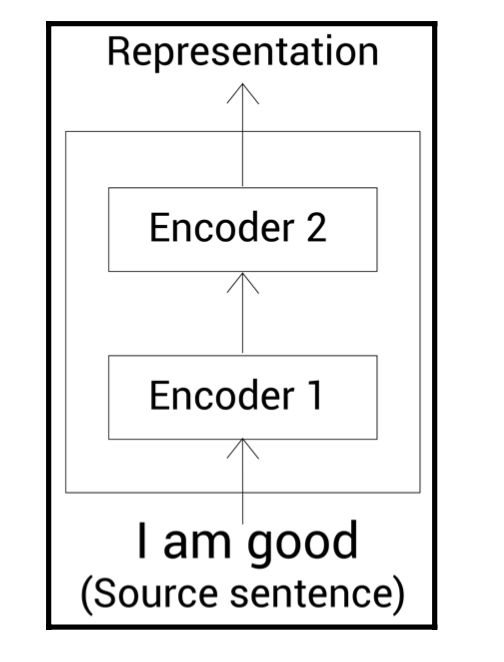

__So whats Inside the encoder?__
Single encoder is consist of Multi-head Attention and Feedforward network. 
Multi-Head attention is based on self attention mechanism. 

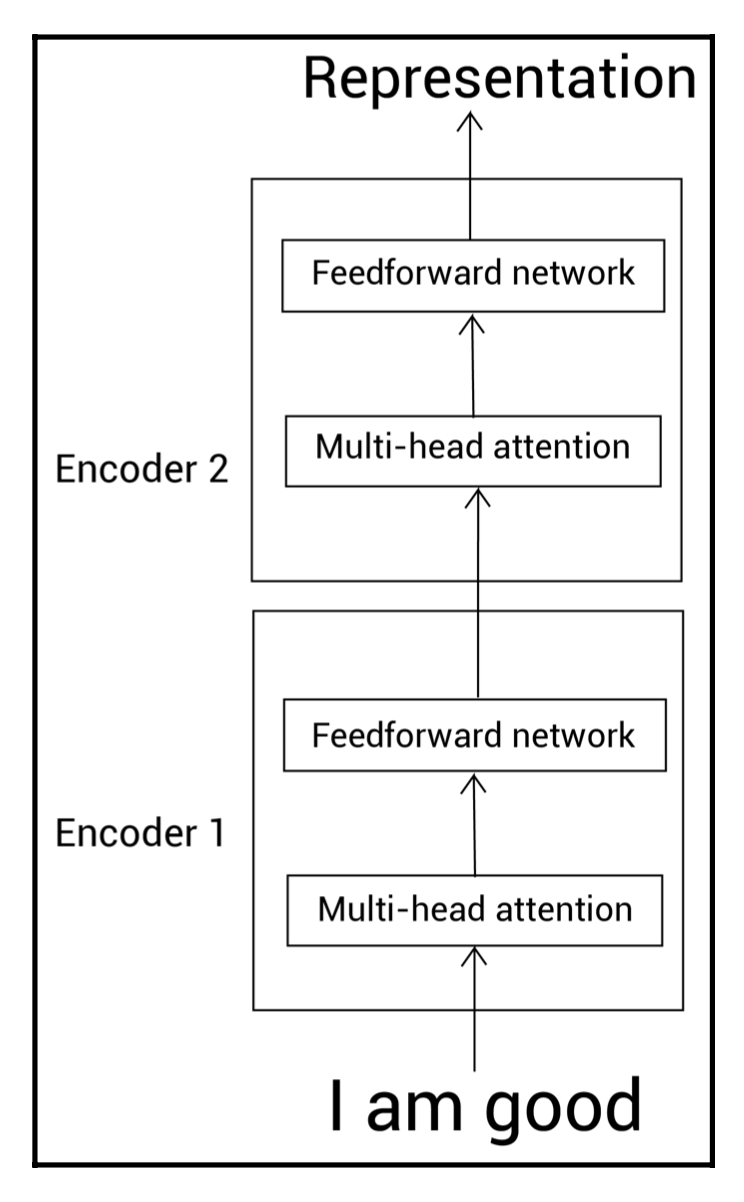


## Understanding Self-attention Mechanism

 _Also called as __Scaled dot product attention.___

In order to understand the self- attention mechanism, for below mentioned example:  
        _"A dog ate the food because it was hungry."_<br>
__Question:__ What does 'it' mean in the sentence 'dog' or 'food'?  
__Answer:__ Obviously, dog.  
__Question2:__ So how does machine findout that relation?  
__Answer:__ Using Self attention Mechanism.   

Basically, in self attention mechanism, model learns the representation of each word with respect to other words or relate with other words in order to get more information about the word.  
As shown in figure, while learning about the representation, it find outs that it relate to dog as compare to other words.


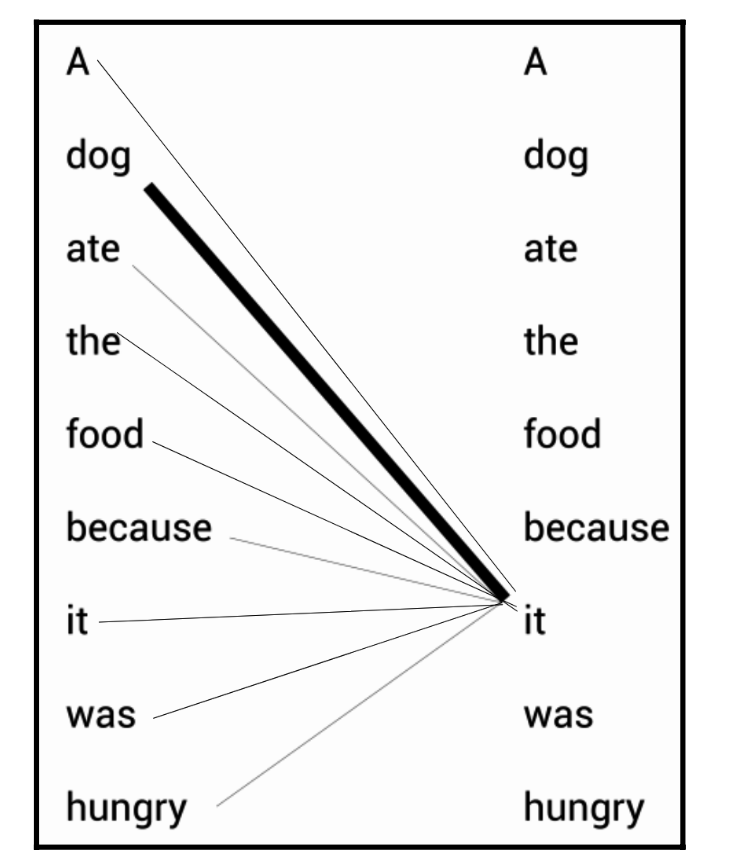

#### OUESTIONS: HOW DOES THIS WORKS?


In [3]:
import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

/Users/teetusaini/miniforge3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [6]:
sentence= 'A dog ate the food because it was starving'
tokens=sentence.split(' ')
vector=[]
for tok in sentence.split(' '):
    vector.append(list(wv[tok]))
x=np.array(vector)
#vector representation of the sentence 
x.shape

(9, 300)

Now we will create three new matrices.  
__Query matrix Q  
Key Matrix K  
Value Matrix V__

To create these matrix, we create three new weights matrix $$W_q, W_k, W_v$$
and   
$$ Q= x.W_q $$
$$K=x.W_k$$ 
$$V= x.W_v$$
__Note:__ the weight matrices are randomly initialized and their optimal values will be learned during training. As we learn the optimal weights, we will obtain more accurate query, key, and value matrices.


In [7]:
#now randomly creating the weight matrix 
W_q=np.random.randn(x.shape[1],64)
W_k=np.random.randn(x.shape[1],64)
W_v=np.random.randn(x.shape[1],64)
W_q.shape

(300, 64)

In [8]:
#Creating the Query, Key, and Value Matrix
Q= np.dot(x,W_q)
K=np.dot(x,W_k)
V= np.dot(x,W_v)
Q.shape

(9, 64)

### Step 1
Computing Dot product between Query Q, and K 

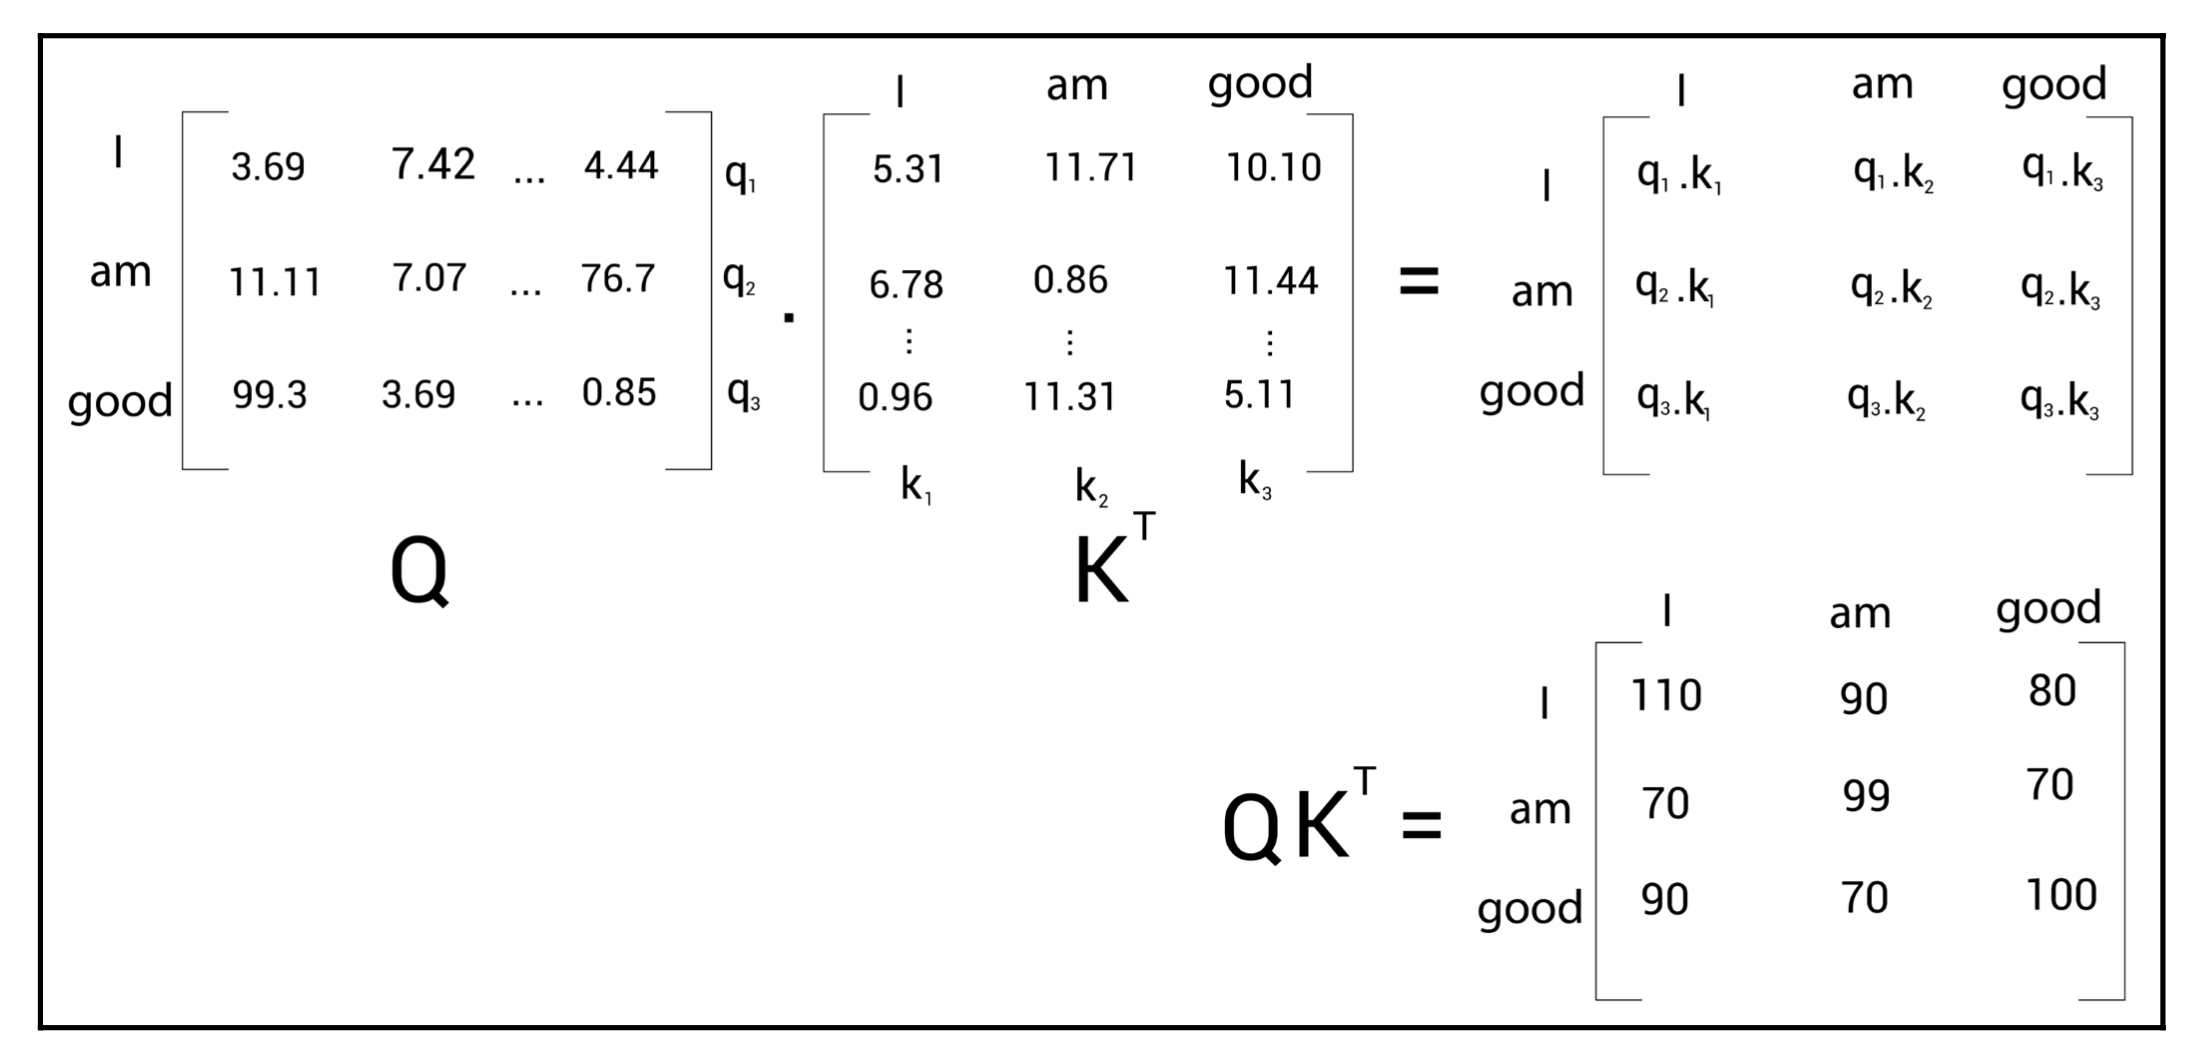

__Computing the dot product between two vectors tells us how similar they are, we can also call this similarity score.__


In [9]:
# QK= np.dot(Q,K.transpose())
QK=Q@K.transpose()
QK.shape

(9, 9)

In [10]:
#lets visualize it proper in dataframe
df_qk= pd.DataFrame(QK,columns=tokens,index=tokens)
df_qk

,A,dog,ate,the,food,because,it,was,starving
A,52.512618,-10.173796,-0.529247,-31.448193,-45.072244,-29.310408,-60.080714,2.894326,-75.985040
dog,41.038758,-100.827312,119.775044,40.443436,117.255603,-0.622065,24.031585,4.766703,-8.539758
ate,-7.805058,103.306915,56.306936,0.912021,-36.473880,11.706919,-3.852730,-24.088462,8.980972
the,6.481891,40.226665,17.689880,-20.193710,-17.142297,-6.371558,-16.775137,-39.612596,-10.561209
food,72.191946,-36.118102,48.653724,-11.045130,21.333725,-4.505372,-50.088945,-18.536057,-9.296987
because,-15.787764,27.202527,-62.027430,-27.866830,22.806412,-5.632070,-23.200732,-15.796400,53.586535
it,-45.090793,19.855474,-5.236113,-22.824192,-21.602158,-3.699434,-21.806634,-23.687826,9.380485
was,-36.251796,24.639577,-0.907129,-9.948645,43.435608,13.397270,-0.823307,6.298950,51.209451
starving,26.516319,-20.841199,96.215095,-16.500683,128.341369,-23.604447,-22.957768,-12.804443,111.044684


### Step 2
The next step in the self-attention mechanism is to __divide the matrix by the square root of the dimension of the key vector__.  
__This is useful in obtaining stable gradients.__
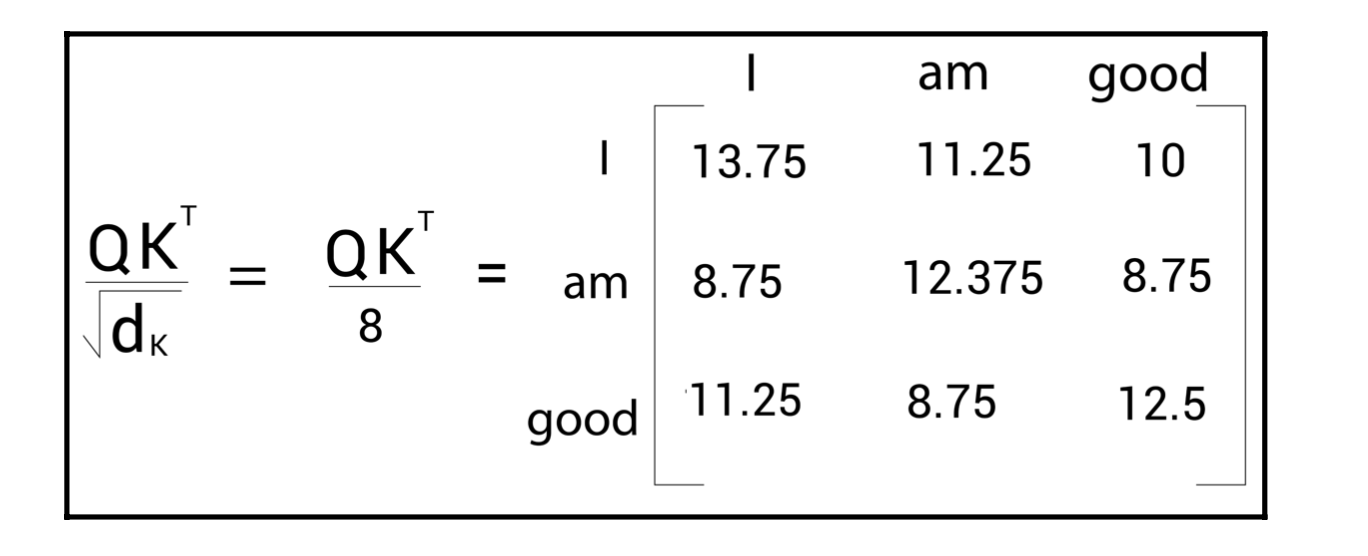


In [11]:
QK_d=np.divide(QK,np.sqrt(K.shape[1]))
QK_d.shape

(9, 9)

In [12]:
#again visualize this in dataframe 
df_QK_d= pd.DataFrame(QK_d,columns=tokens,index=tokens)
df_QK_d

,A,dog,ate,the,food,because,it,was,starving
A,6.564077,-1.271724,-0.066156,-3.931024,-5.634031,-3.663801,-7.510089,0.361791,-9.498130
dog,5.129845,-12.603414,14.971880,5.055430,14.656950,-0.077758,3.003948,0.595838,-1.067470
ate,-0.975632,12.913364,7.038367,0.114003,-4.559235,1.463365,-0.481591,-3.011058,1.122621
the,0.810236,5.028333,2.211235,-2.524214,-2.142787,-0.796445,-2.096892,-4.951575,-1.320151
food,9.023993,-4.514763,6.081715,-1.380641,2.666716,-0.563172,-6.261118,-2.317007,-1.162123
because,-1.973470,3.400316,-7.753429,-3.483354,2.850802,-0.704009,-2.900091,-1.974550,6.698317
it,-5.636349,2.481934,-0.654514,-2.853024,-2.700270,-0.462429,-2.725829,-2.960978,1.172561
was,-4.531475,3.079947,-0.113391,-1.243581,5.429451,1.674659,-0.102913,0.787369,6.401181
starving,3.314540,-2.605150,12.026887,-2.062585,16.042671,-2.950556,-2.869721,-1.600555,13.880585


### Step 3
Now normalizing the similarity score, using softmax function. Which helps in bringing the score to range of 0 to 1 and sum of score will be 1.Also, called __Attention Score__.
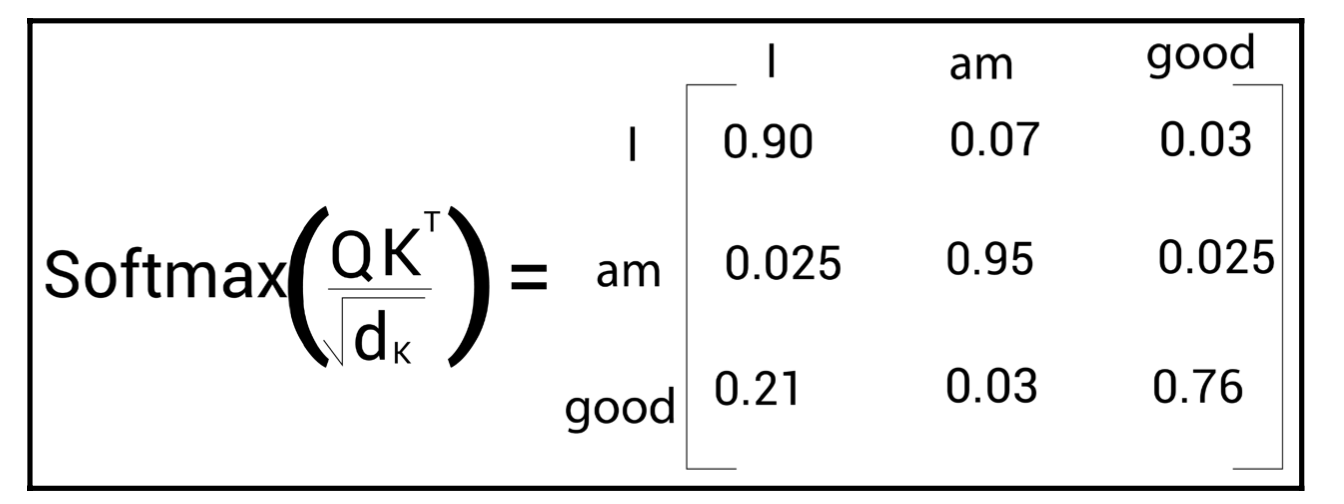


In [13]:
from sklearn.utils.extmath import softmax

soft_QK_d= softmax(QK_d)
soft_QK_d.shape

(9, 9)

In [14]:
#Checking row sum is 1 or not 
np.sum(soft_QK_d[0]),soft_QK_d[0]

(1.0,
 array([9.96204745e-01, 3.93824888e-04, 1.31484624e-03, 2.75666494e-05,
        5.02085536e-06, 3.60111966e-05, 7.69158355e-07, 2.01711102e-03,
        1.05346623e-07]))

In [15]:
#again visualize this in dataframe 
df_soft_QK_d= pd.DataFrame(np.round(soft_QK_d*100,2),columns=tokens,index=tokens,dtype=float)
df_soft_QK_d

,A,dog,ate,the,food,because,it,was,starving
A,99.62,0.04,0.13,0.00,0.00,0.00,0.00,0.20,0.00
dog,0.00,0.00,57.81,0.00,42.19,0.00,0.00,0.00,0.00
ate,0.00,99.72,0.28,0.00,0.00,0.00,0.00,0.00,0.00
the,1.36,92.48,5.53,0.05,0.07,0.27,0.07,0.00,0.16
food,94.82,0.00,5.00,0.00,0.16,0.01,0.00,0.00,0.00
because,0.02,3.49,0.00,0.00,2.01,0.06,0.01,0.02,94.40
it,0.02,72.12,3.13,0.35,0.40,3.80,0.39,0.31,19.47
was,0.00,2.52,0.10,0.03,26.45,0.62,0.10,0.25,69.90
starving,0.00,0.00,1.59,0.00,88.25,0.00,0.00,0.00,10.16


### Step 4
Now, the final step in the self-attention mechanism is to compute the attention matrix,z. Z is called as Attention Matrix.

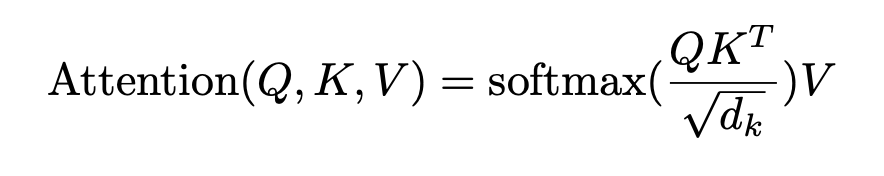


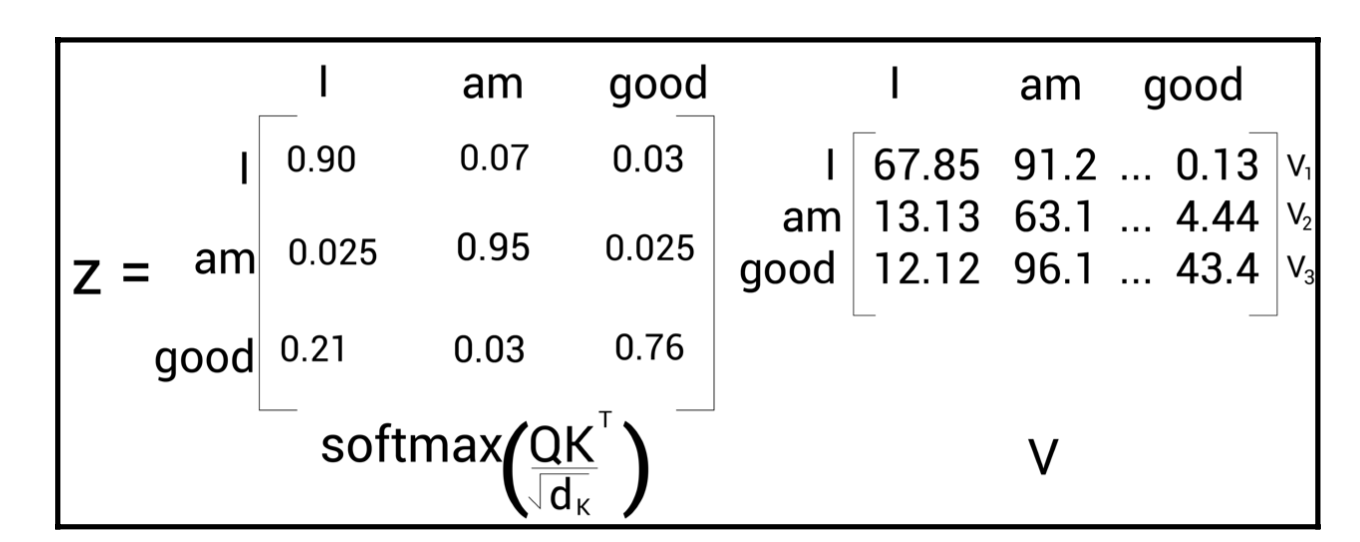



In [16]:
z= np.matmul(soft_QK_d,V)
z.shape

(9, 64)

In [17]:
df_z= pd.DataFrame(np.round(np.sum(z,axis=1),2),index=tokens,dtype=float)
df_z

,0
A,6.81
dog,11.75
ate,10.88
the,11.11
food,7.34
because,4.28
it,9.13
was,4.11
starving,4.03


### Putting it all together 

Self attention mechanism is looks like this:

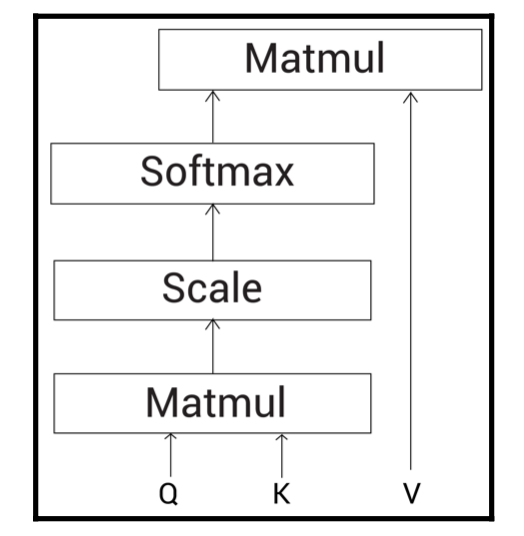

In [18]:
def self_attention(embedd):
    # creating random weigth matrix
    W_q=np.random.randn(x.shape[1],64)
    W_k=np.random.randn(x.shape[1],64)
    W_v=np.random.randn(x.shape[1],64)
    
    #Creating the Query, Key, and Value Matrix
    Q= np.dot(x,W_q)
    K=np.dot(x,W_k)
    V= np.dot(x,W_v)
    
    # QK= np.dot(Q,K.transpose())
    #step 1
    #QK=Q@K.transpose()
    QK= np.dot(Q,K.transpose())
    
    #step 2 
    QK_d=np.divide(QK,np.sqrt(K.shape[1]))
    
    #step 3
    soft_QK_d= softmax(QK_d)
    
    #step 4
    attention_matrix= np.matmul(soft_QK_d,V)
    
    return attention_matrix

In [19]:
self_attention(x).shape

(9, 64)

# Multihead Attention
- Instead of single attention we use multihead attention, in order to enhance the accuracy in the calculation. 

__non ambiguous example__  
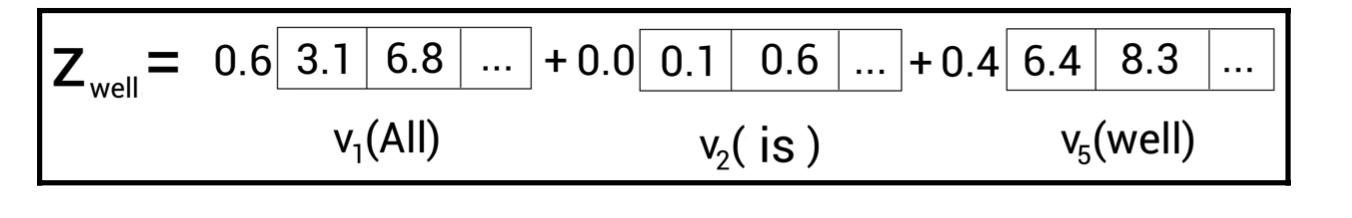  
 __ambiguous example__ 
 
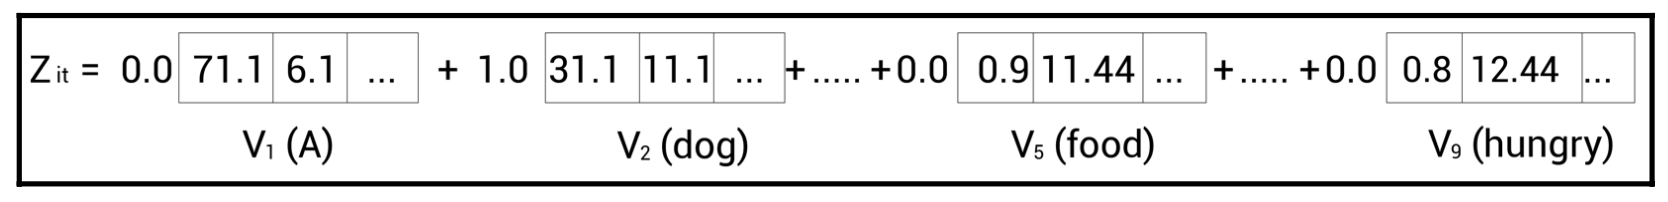  

Thus, if the value vector of other words dominates the actual word in cases as shown in the preceding example, where the actual word is ambiguous, then this dominance is useful; otherwise, it will cause an issue in understanding the right meaning of the word. So, in order to make sure that our results are accurate, instead of computing a single attention matrix, we will compute multiple attention matrices and then concatenate their results. The idea behind using multi-head attention is that instead of using a single attention head, if we use multiple attention heads, then our attention matrix will be more accurate.

\begin{equation}
\text{Multi-Head Attention} = Concatenate(z_1,z_2,...z_n)W^0
\end{equation}



In [61]:
# calculating three multihead attention 

z1= self_attention(x)
z2= self_attention(x)
z3= self_attention(x)

z1.shape,z2.shape,z3.shape

((9, 64), (9, 64), (9, 64))

In [62]:
multi_head_attention= np.hstack((z1,z2,z3))
multi_head_attention.shape

(9, 192)

In [79]:
#putting it all together 
def multiheadattention(x,num_of_head=8):
    Z=[]
   
    for i in range(num_of_head):
        if i==0:
            Z= self_attention(x)
        else:
            Z=np.hstack((Z,self_attention(x)))
    #creating random weight matrix
    w_0= np.random.randn(Z.shape[1],64) # training =True
    Z= np.dot(Z,w_0)
    return Z
    

In [80]:
multi_head_attention=multiheadattention(x,8)
multi_head_attention.shape

(9, 64)

In [81]:
#visualizing in dataframe 
df_z= pd.DataFrame(np.round(np.sum(z,axis=1),2),index=tokens,dtype=float)
df_z

,0
A,6.81
dog,11.75
ate,10.88
the,11.11
food,7.34
because,4.28
it,9.13
was,4.11
starving,4.03


__Overall__

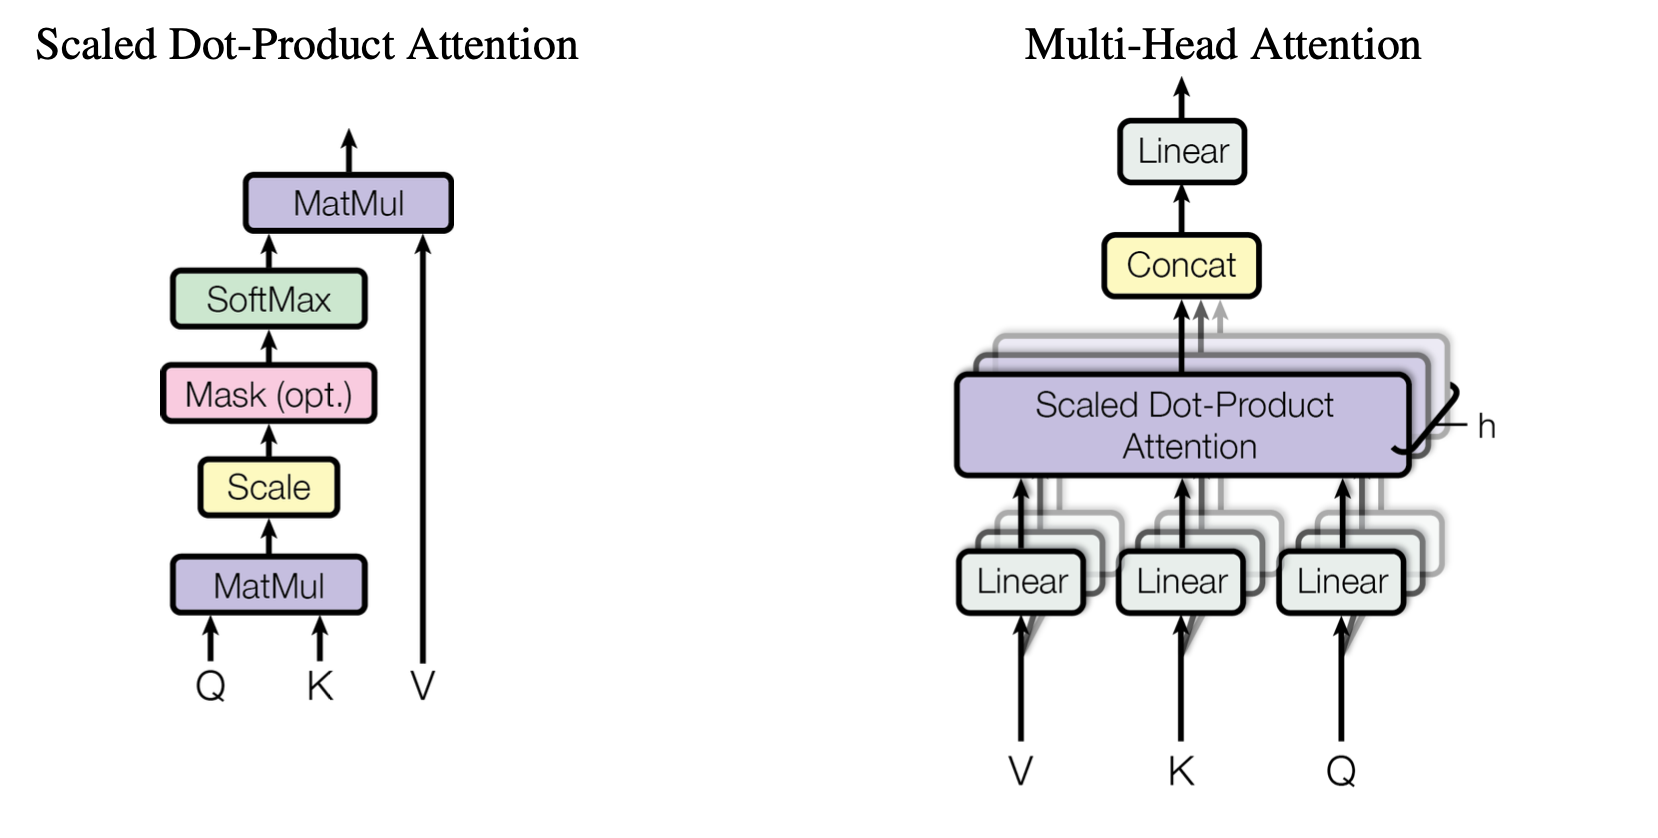  


## Understanding Positional Encoding

- In sequential model, we feed sentence to network word by word and so on, So, network understand the sentence and no positional encoding is required. 
- But, in transformer model we feed all the words parallely hence understanding the sentence was a problem. 
- Hence, positional encoding is required in order to understand the word order. 

__How to achieve that ?__
- To do this, we introduce a technique called positional encoding. Positional encoding, as the name suggests, is an encoding indicating the position of the word in a sentence (word order).

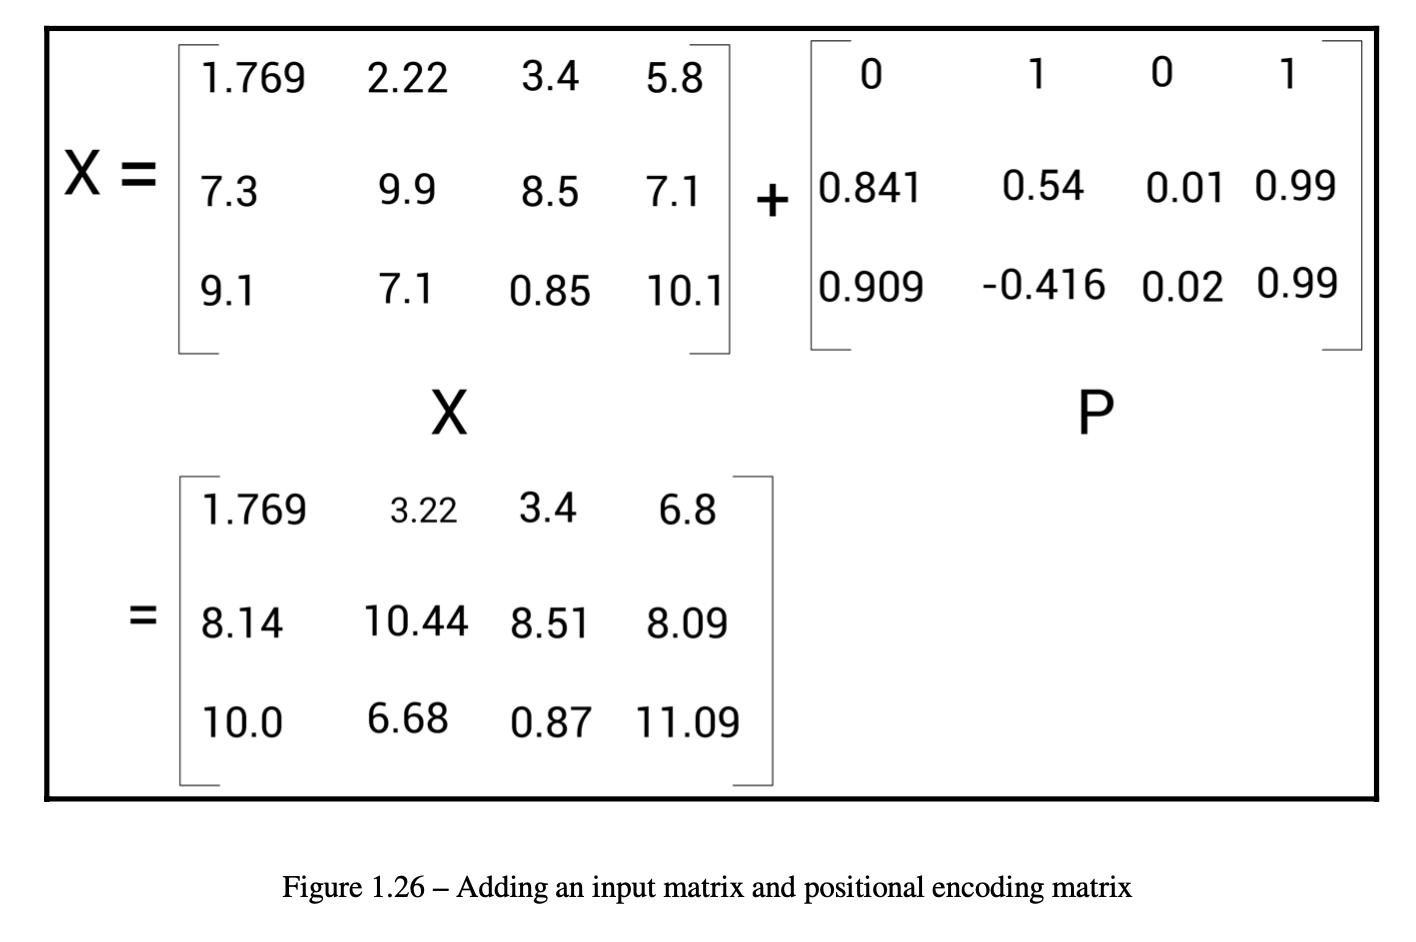  

__The authors of the transformer paper Attention Is All You Need have used the sinusoidal function for computing the positional encoding, as shown:__
 
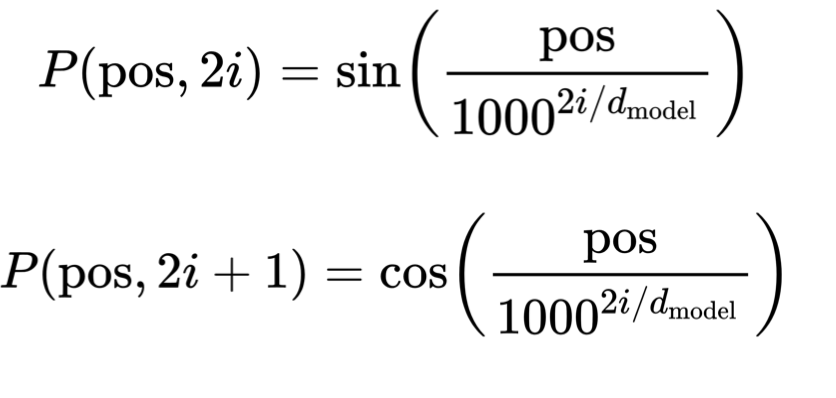  
\begin{equation}
 \text{pos} = \text{position of the word in the sentence. }
 \text{i} = \text{position of the embedding. }
 d_{model} = \text{dimension of the embedding matrix. In this case 4. }
\end{equation}

__Example__

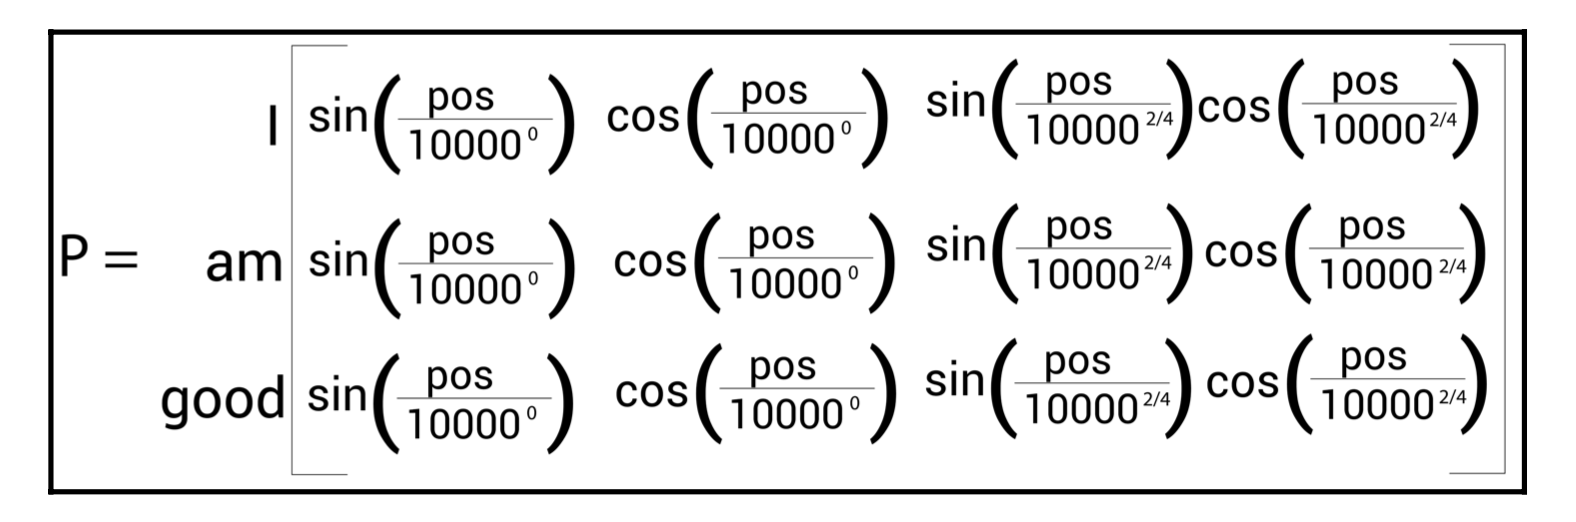 


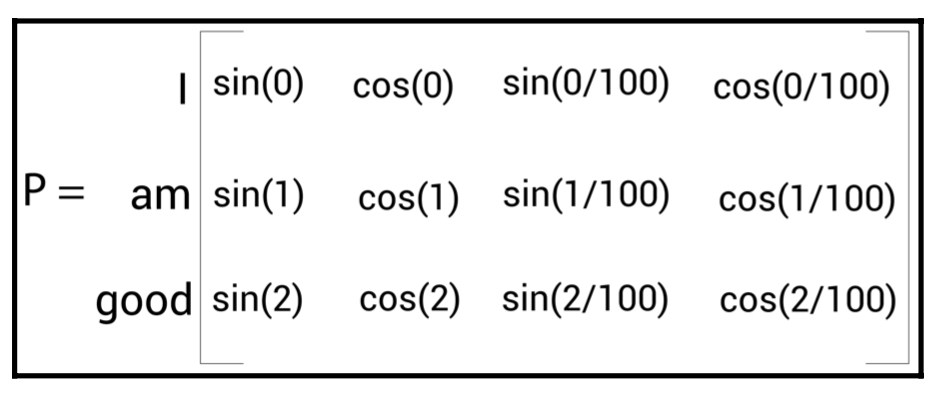 

 


In [89]:
# performing position encoding 

#creating random positional embedding
p=np.zeros(x.shape)
d_model= x.shape[1]

for i in range(x.shape[0]):
    for j in range(0,d_model,2):
        p[i][j]= np.sin(i/(1000**((2*j)/d_model)))
        p[i][j+1]= np.cos(i/(1000**((2*j)/d_model)))

print('Shape:',p.shape)
p

Shape: (9, 300)


array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 8.41470985e-01,  5.40302306e-01,  7.90736287e-01, ...,
         1.00000000e+00,  1.09647820e-06,  1.00000000e+00],
       [ 9.09297427e-01, -4.16146837e-01,  9.68109419e-01, ...,
         1.00000000e+00,  2.19295639e-06,  1.00000000e+00],
       ...,
       [-2.79415498e-01,  9.60170287e-01, -7.25059145e-01, ...,
         1.00000000e+00,  6.57886918e-06,  1.00000000e+00],
       [ 6.56986599e-01,  7.53902254e-01,  1.00719496e-01, ...,
         1.00000000e+00,  7.67534737e-06,  1.00000000e+00],
       [ 9.89358247e-01, -1.45500034e-01,  8.48371423e-01, ...,
         1.00000000e+00,  8.77182557e-06,  1.00000000e+00]])

In [93]:
#creating function 
def positional_encoding(x):
    p=np.zeros(x.shape)
    d_model= x.shape[1]
    for i in range(x.shape[0]):
        for j in range(0,d_model,2):
            p[i][j]= np.sin(i/(1000**((2*j)/d_model)))
            p[i][j+1]= np.cos(i/(1000**((2*j)/d_model)))

    print('Shape:',p.shape)
    x+=p
    return x


In [94]:
x_aft_pe=positional_encoding(x)
x_aft_pe

Shape: (9, 300)


array([[-0.10595703,  2.2138672 ,  0.11865234, ...,  2.1069336 ,
         0.02368164,  1.9645996 ],
       [ 1.7342114 ,  1.0582657 ,  1.408621  , ...,  2.4160156 ,
        -0.35546654,  2.2226562 ],
       [ 1.5060948 , -0.74440306,  1.8851935 , ...,  1.8330078 ,
         0.12060985,  1.9538574 ],
       ...,
       [-0.47435835,  1.9199877 , -1.3968956 , ...,  2.0170898 ,
         0.06080417,  1.8911133 ],
       [ 1.3399742 ,  1.5059124 ,  0.38698584, ...,  1.878418  ,
         0.22169504,  1.9780273 ],
       [ 2.140826  ,  0.1523593 ,  1.5551413 , ...,  2.1640625 ,
        -0.19724807,  1.9238281 ]], dtype=float32)

#### How position encoding work ?

In [121]:
from sklearn.metrics.pairwise import cosine_similarity

print("Positional Encoding")
print(cosine_similarity(p[0].reshape(1,-1),p[1].reshape(1,-1)))
print(cosine_similarity(p[0].reshape(1,-1),p[3].reshape(1,-1)))
print(cosine_similarity(p[0].reshape(1,-1),p[5].reshape(1,-1)))
print(cosine_similarity(p[0].reshape(1,-1),p[8].reshape(1,-1)))


# after adding in the embedding matrix
print("Embedding with positional Encoding")
print(cosine_similarity(x_aft_pe[0].reshape(1,-1),x_aft_pe[1].reshape(1,-1)))
print(cosine_similarity(x_aft_pe[0].reshape(1,-1),x_aft_pe[3].reshape(1,-1)))
print(cosine_similarity(x_aft_pe[0].reshape(1,-1),x_aft_pe[5].reshape(1,-1)))
print(cosine_similarity(x_aft_pe[0].reshape(1,-1),x_aft_pe[8].reshape(1,-1)))

Positional Encoding
[[0.98106648]]
[[0.88070343]]
[[0.82582845]]
[[0.81233963]]
Embedding with positional Encoding
[[0.9689044]]
[[0.87473106]]
[[0.81661016]]
[[0.7958306]]


__As we can see , farther the word have lower cosine similarity. Thats the essence of the position encoding to ensure the word position.__